In [1]:
from scipy.ndimage import label, generate_binary_structure
from PIL import Image
import numpy as np
a = np.array([[0,0,1,1,0,0],
              [0,0,0,1,0,0],
              [1,1,0,0,1,0],
              [0,0,0,1,0,0]])
labeled_array, num_features = label(a)
print(labeled_array, num_features)

[[0 0 1 1 0 0]
 [0 0 0 1 0 0]
 [2 2 0 0 3 0]
 [0 0 0 4 0 0]] 4


In [2]:
capcycle = "/Users/pm286/workspace/jupyter/physchem/images/capacitycycle.png"
array = Image.open(capcycle)
print(type(array))
with Image.open(capcycle) as im:
    print(im.format, im.size, im.mode)
    print(im.getdata())


<class 'PIL.PngImagePlugin.PngImageFile'>
PNG (830, 652) RGB


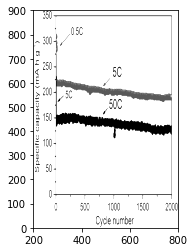

In [3]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

img = imageio.imread(capcycle)
gray = lambda rgb : np.dot(rgb[... , :3] , [0.299 , 0.587, 0.114]) 
gray = gray(img)  

plt.imshow(gray, cmap=plt.cm.gray, vmin=10, vmax=200, extent=(200,800,0,900))
# plt.imshow(gray, cmap = plt.get_cmap(name = 'gray'), vmin=10, vmax=200, extent=(200,800,0,900))
# print(gray)

In [ ]:
import cv2
import numpy as np

# img = cv2.imread('input.png', 0)

size = 2
kernel = np.ones((size,size), np.uint8)
# kernel = np.ones((3,3), np.uint8)
# kernel = np.ones(7,7, np.uint8)

# NOTE this erodes the white!
img_erosion = cv2.erode(img, kernel, iterations=1)
#print(img_erosion)
img_erosion_dilate = cv2.dilate(img_erosion, kernel, iterations=1)
#print(img_erosion_dilate)
img_dilation = cv2.dilate(img, kernel, iterations=1)
#print(img_dilation)
img_dilation_erode = cv2.erode(img_dilation, kernel, iterations=1)
#print(img_dilation_erode)

cv2.imshow('Input', img)
cv2.imshow('Erosion '+str(size), img_erosion)
cv2.imshow('Dilation'+str(size), img_dilation)
cv2.imshow('Erosion_dilate'+str(size), img_erosion_dilate )
cv2.imshow('Dilation_erode'+str(size), img_dilation_erode)

cv2.waitKey(0)

In [ ]:
from scipy import ndimage
labeled_gray, num_features = label(gray)
print (labeled_gray, num_features)
plt.imshow(labeled_gray, vmin=0, vmax=1)  
sizes = ndimage.sum(gray, labeled_gray, range(num_features + 1))
sizes = [round(x) for x in sizes]
print("sizes", sizes)
mean_vals = ndimage.sum(gray, labeled_gray, range(1, num_features + 1))
# print("mean_vals", mean_vals)


In [ ]:

mask = img > img.mean()
print(type(mask))

label_img, nb_labels = ndimage.label(mask)

# Find the largest connected component
sizes = ndimage.sum(mask, label_img, range(nb_labels + 1))
mask_size = sizes < 1000
remove_pixel = mask_size[label_img]
label_img[remove_pixel] = 0
labels = np.unique(label_img)
label_img = np.searchsorted(labels, label_img)

# Now that we have only one connected component, extract it's bounding box
# objects = ndimage.find_objects(label_img==4)
objects = ndimage.find_objects(label_img==1)
print(objects)
slice_x, slice_y = objects[0]
roi = img[slice_x, slice_y]

plt.figure(figsize=(4, 2))
plt.axes([0, 0, 1, 1])
plt.imshow(roi)
plt.axis('off')

plt.show()